<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/06.03-Figures-of-Merit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Closed-loop performance indexes (aka figures of merit)

## Summary

Let's see some closed-loop performance indexes or figures of merit.

## Initializations

In [1]:
from requests import get
!pip install control
from inspect import getsource

# Tip: https://changhsinlee.com/colab-import-python/
url = 'https://raw.githubusercontent.com/gmxavier/FAT0413150/main/src/utils.py'
r = get(url)
with open('utils.py', 'w') as f:
    f.write(r.text)

from utils import pidtest, fom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 6.4 MB/s eta 0:00:00


## Figures of merit function

We wrapped the the calculation of some important figures of merit (FOM) in the `fom` function:

In [2]:
print(getsource(fom))

def fom(inpval):
    r''' Calculates several figures of merit of a closed-loop control (e.g. overshoot, decay ratio, 
    integral of absolute error, integral of squared error, integral of time-weighted absolute error, 
    integral of time-weighted squared error).

    Parameters
    ----------
    inpval : data frame
         Closed-loop (servo control) response (Input is the ISP) 
         (Time, Input and Output)

    Returns
    -------
    retval : tuple
         Figures of merit of a closed-loop (servo control)
         (OS, DR, IAE, ISE, ITAE, ITSE)

    Notes
    -----
  

    Example
    --------

    >>> inpval = pidtest(100,5,2000, out=True)
    >>> fom(inval)


    Reference
    ----------

    '''            
    t = inpval['Time']
    u = inpval['Input']
    y = inpval['Output']
    threshold = u.iloc[-1]
    if u.iloc[-1] > 0:
        aux = np.where(np.where([(y - np.roll(y,1) > 0) & (y - np.roll(y,-1) > 0)],y, 0)> threshold, y,np.nan)
        OS = (aux[aux>threshold][0

## Controller tuning performance

Let's obtain the controller tuning performance of the empirically tuned control.

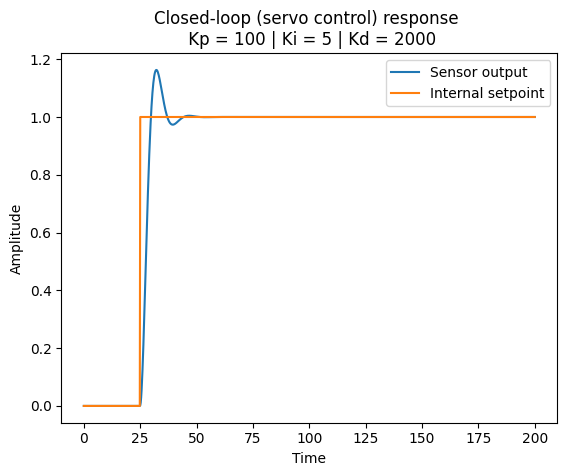

In [17]:
inpval = pidtest(100,5,2000,out=True)

In [28]:
retval = fom(inpval)
print(f"""Controller tuning performance
 Overshoot  : {retval[0]*100:.2f}%
 Decay ratio: 1/{1/retval[1]:.2f}
 IAE        : {retval[2]:.2f}
 ISE        : {retval[3]:.2f}
 ITAE       : {retval[4]:.2f}
 ITSE       : {retval[5]:.2f}""")

Controller tuning performance
 Overshoot  : 16.29%
 Decay ratio: 1/37.62
 IAE        : 3.42
 ISE        : 2.00
 ITAE       : 97.06
 ITSE       : 52.78
